In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('daily-min-temp.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


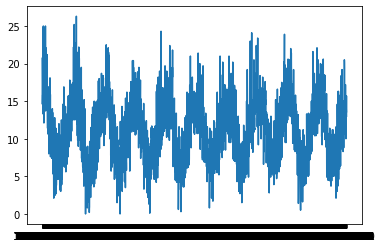

In [4]:
plt.plot(df['Date'], df['Temp'])

In [5]:
N = df.shape[0]
temp = df['Temp'].values
p = 50
X = np.array([temp[i: i + N - p + 1] for i in range(p - 1, -1, -1) ])
k = 3 * (p + 1)
X_T = X.T
st_vect = X_T[-1]
X_T = np.delete(X_T, -1, 0)

In [6]:
def find_min(x, v):
    min_val= min( [(np.sum((x[i] - v) ** 2), i) for i in range(x.shape[0])], key = lambda a: a[0])
    return min_val[1]
neighbors = st_vect
for i in range(k - 1):
    index = find_min(X_T, st_vect)
    neighbors = np.hstack((neighbors,  X_T[index]))
    X_T = np.delete(X_T, index, 0)
